mount drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Necessary Imports

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

Load the Aggregated Data

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Predicting City Traffic Flow Based on Weather and Events/daily_traffic_weather.csv")

 Inspect the dataset

In [10]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province         440 non-null    object 
 1   max              440 non-null    int64  
 2   min              440 non-null    int64  
 3   wind             440 non-null    int64  
 4   wind_d           440 non-null    object 
 5   rain             440 non-null    float64
 6   humidi           440 non-null    int64  
 7   cloud            440 non-null    int64  
 8   pressure         440 non-null    int64  
 9   date             440 non-null    object 
 10  mean_velocity    440 non-null    float64
 11  median_velocity  440 non-null    float64
 12  std_velocity     440 non-null    float64
 13  long             440 non-null    float64
 14  lat              440 non-null    float64
 15  street_level     440 non-null    int64  
 16  e_node_id        440 non-null    int64  
 17  length          

Preprocessing

Check for missing values

In [11]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 province           0
max                0
min                0
wind               0
wind_d             0
rain               0
humidi             0
cloud              0
pressure           0
date               0
mean_velocity      0
median_velocity    0
std_velocity       0
long               0
lat                0
street_level       0
e_node_id          0
length             0
street_type        0
dtype: int64


Drop missing values

In [12]:
df = df.dropna()

In [14]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure', 'date', 'mean_velocity', 'median_velocity', 'std_velocity',
       'long', 'lat', 'street_level', 'e_node_id', 'length', 'street_type'],
      dtype='object')

Select relevant features and target variable

In [19]:
features = ['rain', 'max', 'min', 'humidi', 'cloud', 'pressure','length','wind']
target = 'mean_velocity'

X = df[features]
y = df[target]

Check the distribution of the target variable

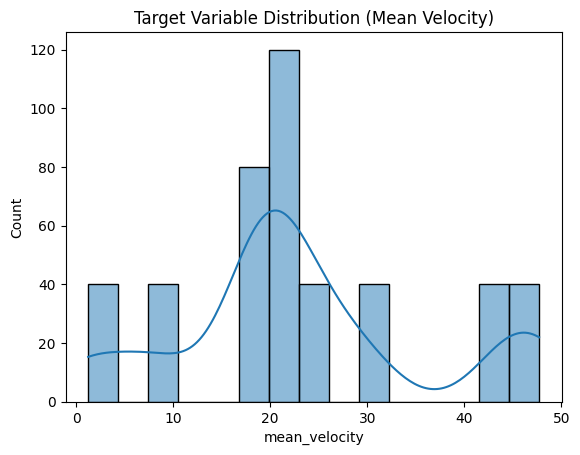

In [20]:
sns.histplot(y, kde=True)
plt.title('Target Variable Distribution (Mean Velocity)')
plt.show()

Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Gradient Boosting Machines Model (XGBoost)

In [22]:
# Define the model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Model Evaluation

In [23]:
# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate performance
def evaluate_model(y_true, y_pred, dataset="Train"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Data Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)

evaluate_model(y_train, y_pred_train, dataset="Train")
evaluate_model(y_test, y_pred_test, dataset="Test")

Train Data Metrics:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R² Score: 1.00
------------------------------
Test Data Metrics:
Mean Squared Error (MSE): 0.06
Mean Absolute Error (MAE): 0.03
R² Score: 1.00
------------------------------


Feature Importance

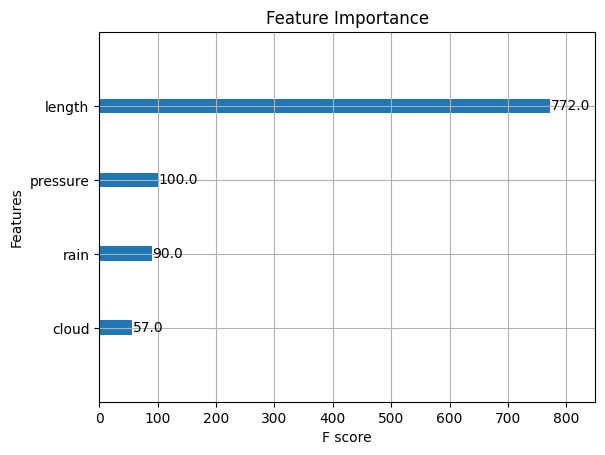

In [24]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

Save the Model

In [25]:
import joblib
joblib.dump(xgb_model, "/content/drive/MyDrive/Predicting City Traffic Flow Based on Weather and Events/xgb_model.pkl")
print("Model saved successfully.")

Model saved successfully.
